## Reading Image using Image URL

In [7]:
# Import essential libraries
import requests
import cv2
import numpy as np
import imutils
import matplotlib.pyplot as plt
import pandas as pd


url = r'https://akns-images.eonline.com/eol_images/Entire_Site/20121016/634.mm.cm.111612_copy.jpg'
resp = requests.get(url, stream=True).raw
image = np.asarray(bytearray(resp.read()), dtype="uint8")
image = cv2.imdecode(image, cv2.IMREAD_COLOR)

# for testing
cv2.imshow('image',image)
cv2.waitKey(0)
cv2.destroyAllWindows()  

  


### Reading Images Locally

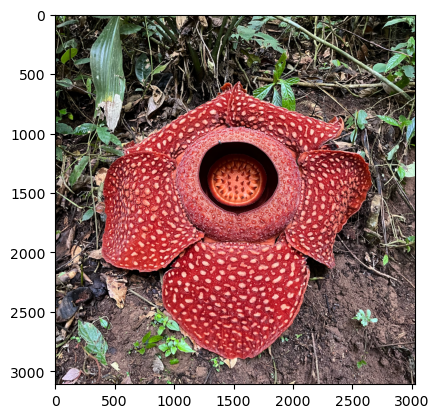

In [4]:
im1=plt.imread(r'C:\Users\thegr\Desktop\Rafflesia_arnoldii,_Sumatra.jpg')
plt.imshow(im1)
plt.show()

In [5]:
im1.shape

(3110, 3024, 3)

In [6]:
im1

array([[[  8,  22,   7],
        [  4,  18,   3],
        [ 12,  26,  11],
        ...,
        [ 96, 135, 114],
        [105, 144, 125],
        [100, 139, 120]],

       [[  4,  18,   3],
        [  6,  20,   5],
        [ 17,  31,  16],
        ...,
        [ 71, 109,  88],
        [ 75, 112,  94],
        [ 74, 111,  93]],

       [[ 11,  25,  10],
        [ 20,  34,  19],
        [ 34,  48,  33],
        ...,
        [ 61,  99,  78],
        [ 63, 100,  82],
        [ 67, 104,  86]],

       ...,

       [[222, 213, 214],
        [228, 219, 220],
        [227, 218, 219],
        ...,
        [ 57,  46,  52],
        [ 53,  42,  48],
        [ 60,  49,  55]],

       [[219, 210, 211],
        [249, 240, 241],
        [245, 236, 237],
        ...,
        [ 53,  42,  48],
        [ 57,  46,  52],
        [ 63,  52,  58]],

       [[228, 219, 220],
        [228, 219, 220],
        [247, 238, 239],
        ...,
        [ 36,  25,  31],
        [ 31,  20,  26],
        [ 30,  19,  25]]

In [8]:
pd.DataFrame(im1[:,:,0])

,0,1,2,3,4,5,6,7,8,9,...,3014,3015,3016,3017,3018,3019,3020,3021,3022,3023
0,8,4,12,27,37,47,52,48,39,35,...,73,74,81,85,87,82,82,96,105,100
1,4,6,17,31,42,52,51,38,31,30,...,63,64,76,76,74,68,66,71,75,74
2,11,20,34,43,48,55,49,33,28,28,...,66,58,64,63,60,59,61,61,63,67
3,23,36,51,56,54,52,46,35,35,31,...,66,71,65,66,63,62,64,61,58,62
4,12,20,33,43,45,47,50,51,47,38,...,71,78,68,74,72,71,75,75,70,69
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3105,142,193,223,227,224,203,202,215,219,162,...,121,103,60,52,62,78,71,71,69,75
3106,201,220,222,222,198,177,191,216,222,190,...,110,96,63,49,43,51,53,56,49,52
3107,222,228,227,234,207,203,192,162,169,170,...,100,95,69,46,40,53,55,57,53,60
3108,219,249,245,255,248,248,185,115,126,162,...,105,113,74,36,27,44,44,53,57,63


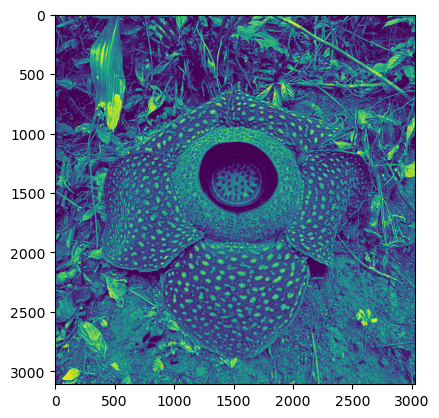

In [11]:
plt.imshow(im1[:,:,2]) # Blue component of Image (in RGB notation)

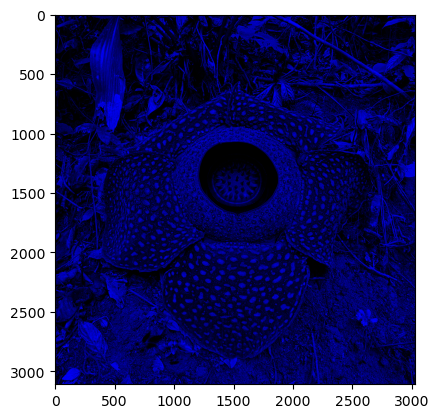

In [14]:
im2=im1.copy()
im2[:,:,0]=0
im2[:,:,1]=0
plt.imshow(im2) # Declaring Red and Green Channel to False. Thus, we get the blue component only.

## cv2 Usage

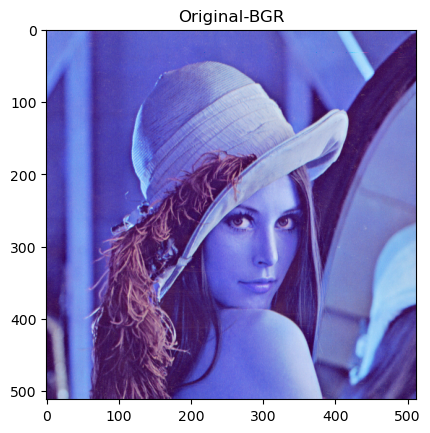

In [15]:
image=cv2.imread(r"C:\Users\thegr\Desktop\All CV\Lena.tiff") # RGB expected via matplotlib
plt.imshow(image)
plt.title("Original-BGR")
plt.show()

In [16]:
image.shape

(512, 512, 3)

In [17]:
# Extracting and showing individual channels
(B,G,R)= cv2.split(image)

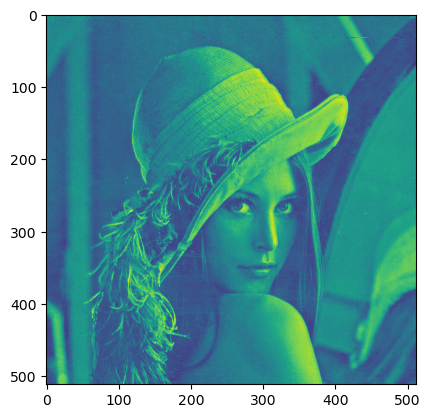

In [18]:
plt.imshow(B)

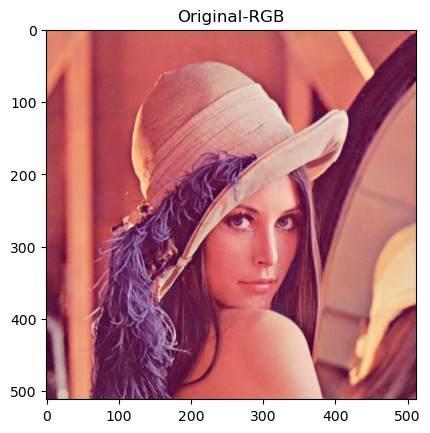

In [19]:
# Merging in the order of R,G,B
rgb_img= cv2.merge([R,G,B])
plt.imshow(rgb_img)
plt.title("Original-RGB")
plt.show()


In [20]:
cv2.imshow("image",R)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [27]:
img1=image.copy()
img=cv2.cvtColor(img1,cv2.COLOR_BGR2GRAY)
cv2.imshow("image",img)
cv2.waitKey(0)
cv2.destroyAllWindows()

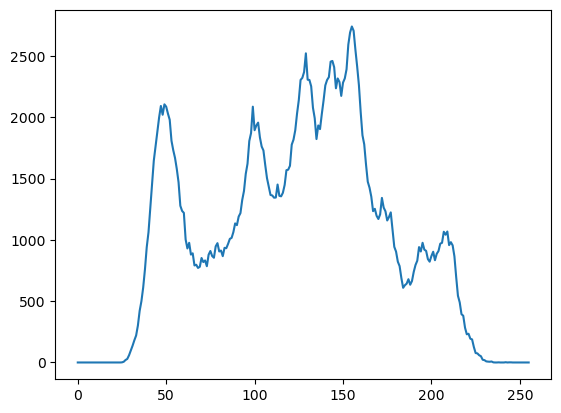

In [29]:
hist_values=cv2.calcHist([img],channels=[0],mask=None,histSize=[256],ranges=[0,256])
plt.plot(hist_values)
plt.show()

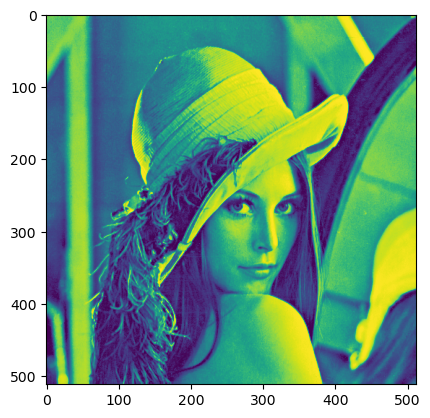

In [34]:
im = cv2.imread(r"C:\Users\thegr\Desktop\All CV\Lena.tiff")    
img=cv2.cvtColor(img1,cv2.COLOR_BGR2GRAY)
eq_img=cv2.equalizeHist(img)
plt.imshow(eq_img)

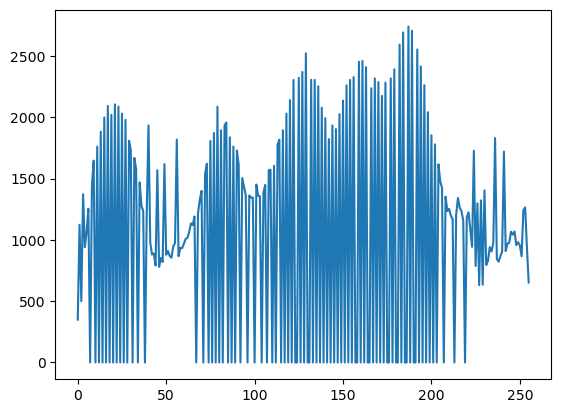

In [35]:
hist_values=cv2.calcHist([eq_img],channels=[0],mask=None,histSize=[256],ranges=[0,256])
plt.plot(hist_values)
plt.show()

### Spatial filtering of Images

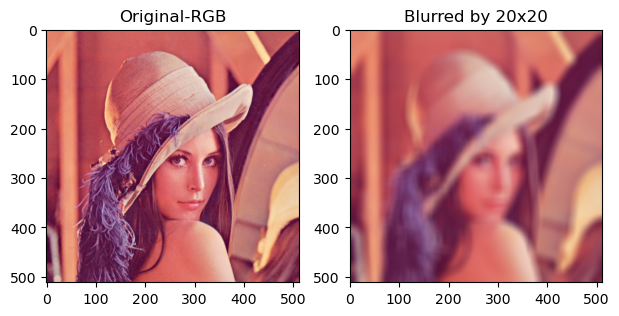

In [39]:
plt.figure(figsize=(15,10))
img1=cv2.imread(r"C:\Users\thegr\Desktop\All CV\Lena.tiff")
img=cv2.cvtColor(img1,cv2.COLOR_BGR2RGB)

plt.subplot(141)
plt.imshow(img)
plt.title("Original-RGB")

plt.subplot(142)
#Blur with 5x5 average filter (reduces and increases intensity to an average,thus, blurring the image.)(Increasing the filter size blurres the image further)
blur1=cv2.blur(img,(20,20))
plt.imshow(blur1)
plt.title("Blurred by 20x20")

plt.show()

error: OpenCV(4.7.0) D:\a\opencv-python\opencv-python\opencv\modules\imgproc\src\smooth.dispatch.cpp:294: error: (-215:Assertion failed) ksize.width > 0 && ksize.width % 2 == 1 && ksize.height > 0 && ksize.height % 2 == 1 in function 'cv::createGaussianKernels'


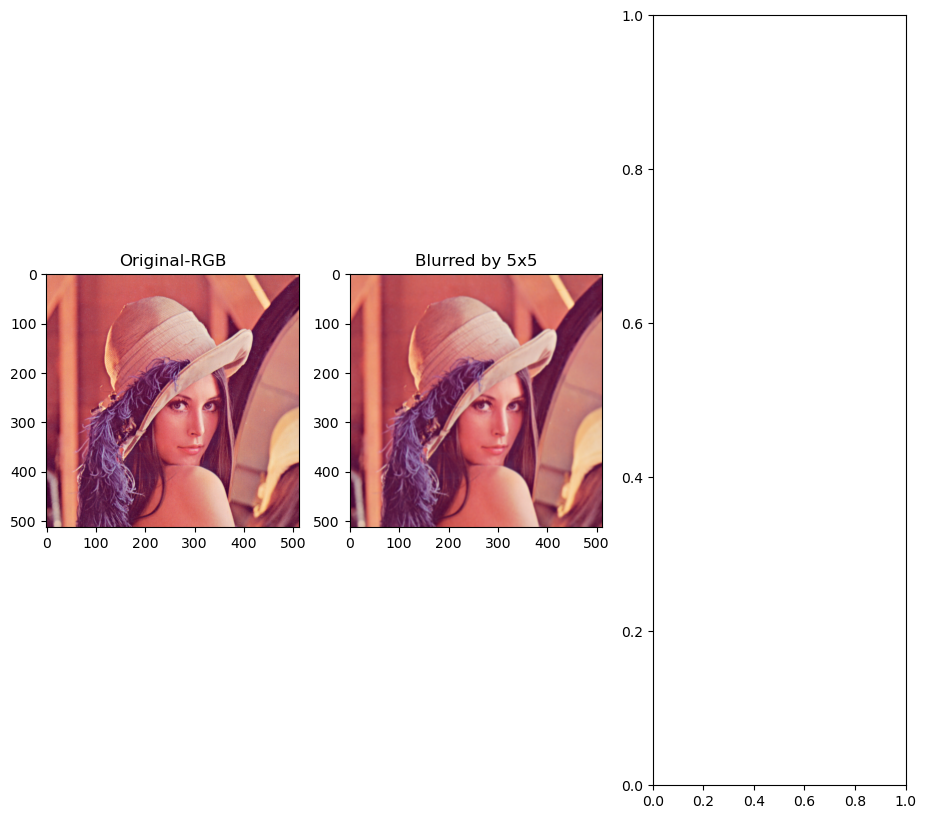

In [53]:
plt.figure(figsize=(15,10))
img1=cv2.imread(r"C:\Users\thegr\Desktop\All CV\Lena.tiff")
img=cv2.cvtColor(img1,cv2.COLOR_BGR2RGB)

plt.subplot(141)
plt.imshow(img)
plt.title("Original-RGB")

plt.subplot(142)
#Blur with 5x5 average filter (reduces and increases intensity to an average,thus, blurring the image.)(Increasing the filter size blurres the image further)
blur1=cv2.GaussianBlur(img,(5,5),0)
plt.imshow(blur1)
plt.title("Blurred by 5x5")

plt.subplot(143)
blur1=cv2.GaussianBlur(img,(20,20),0)
plt.imshow(blur1)
plt.title("Blurred by 20x20")

plt.subplot(144)
blur1=cv2.GaussianBlur(img,(35,35),0)
plt.imshow(blur1)
plt.title("Blurred by 35x35")

plt.show()

In [46]:
img1=cv2.imread(r"C:\Users\thegr\Desktop\All CV\Lena.tiff")
img2=cv2.cvtColor(img1,cv2.COLOR_BGR2GRAY)

threshold,binary_img= cv2.threshold(img2,125,255, cv2.THRESH_BINARY)

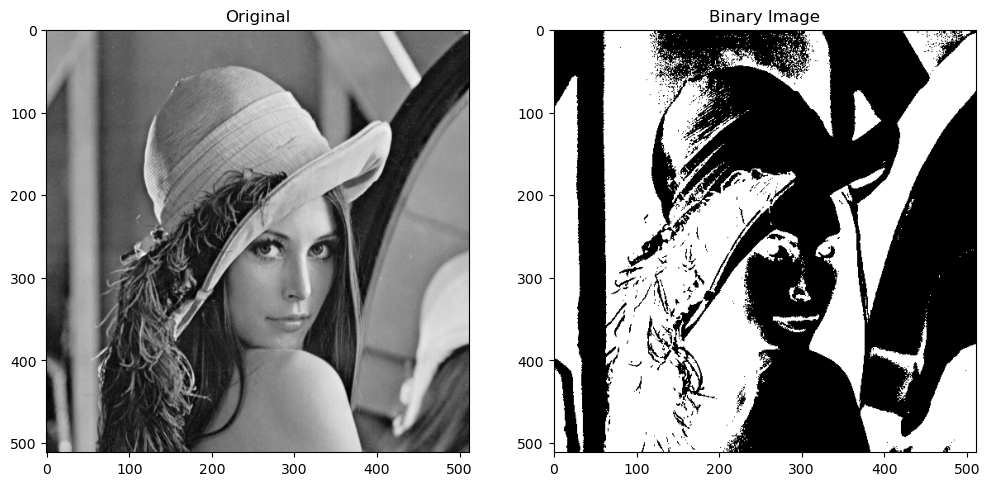

In [48]:
plt.figure(figsize=(12,8))
plt.subplot(121)
plt.imshow(img2, cmap='gray')
plt.title("Original")

plt.subplot(122)
plt.imshow(binary_img,cmap='binary')
plt.title("Binary Image")

plt.show()

### Drawing Line, Rectangle and Circle on top of an Image

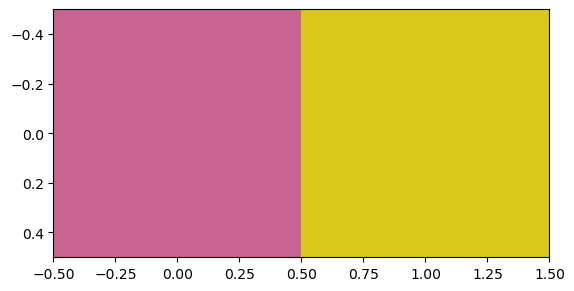

In [52]:
a1=np.array([[[200,100,145],[215,200,25]]])
plt.imshow(a1)

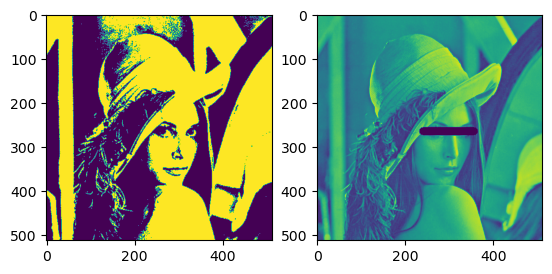

In [71]:
img1=cv2.imread(r"C:\Users\thegr\Desktop\All CV\Lena.tiff")
img2=cv2.cvtColor(img1,cv2.COLOR_BGR2GRAY)

threshold,binary_img= cv2.threshold(img2,125,255, cv2.THRESH_BINARY)

plt.subplot(121)
plt.imshow(binary_img)

plt.subplot(122)
cv2.line(img2,(240,265),(355,265),(0,0,255),17) # (starting co-ordinate, end co-ordinate, line color code)
plt.imshow(img2)


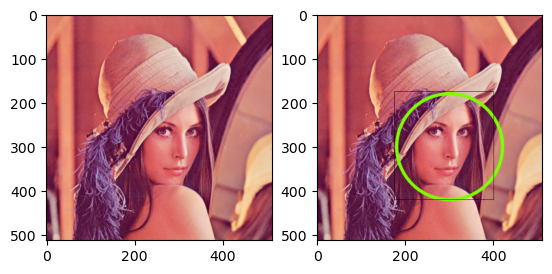

In [84]:
## Drawing rectangle over an image
img1=cv2.imread(r"C:\Users\thegr\Desktop\All CV\Lena.tiff")
img2=cv2.cvtColor(img1, cv2.COLOR_BGR2RGB)

plt.subplot(121)
plt.imshow(img2)



plt.subplot(122)
cv2.circle(img2, (300,300),120,(125,255,0),thickness=5, lineType=cv2.LINE_AA)
plt.imshow(img2)


cv2.rectangle(img2, (175,420),(400,175),10)
plt.imshow(img2)

plt.show()